# '당황' 키워드의 train데이터를 감정 대분류 모델을 통해 분류

In [2]:
import pandas as pd

data_df = pd.read_csv('./keyword_emotion_sentence_only.csv')

In [3]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42874 entries, 0 to 42873
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  42874 non-null  int64 
 1   상황키워드       42874 non-null  object
 2   감정_대분류      42874 non-null  object
 3   사람문장        42874 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.3+ MB


In [4]:
data_df['사람문장'] = data_df['사람문장'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")


/var/folders/p4/ybhgl5113q57lp0vhqc2znhr0000gn/T/ipykernel_32071/1986910390.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data_df['사람문장'] = data_df['사람문장'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")


In [5]:
data_df['사람문장'].head(10)

0    일은 왜 해도 해도 끝이 없을까 화가 난다 그냥 내가 해결하는 게 나아 남들한테 부...
1    이번 달에 또 급여가 깎였어 물가는 오르는데 월급만 자꾸 깎이니까 너무 화가 나 최...
2    회사에 신입이 들어왔는데 말투가 거슬려 그런 애를 매일 봐야 한다고 생각하니까 스트...
3    직장에서 막내라는 이유로 나에게만 온갖 심부름을 시켜 일도 많은 데 정말 분하고 섭...
4    얼마 전 입사한 신입사원이 나를 무시하는 것 같아서 너무 화가 나 상사인 나에게 먼...
5    직장에 다니고 있지만 시간만 버리는 거 같아 진지하게 진로에 대한 고민이 생겨 직장...
6    성인인데도 진로를 아직도 못 정했다고 부모님이 노여워하셔 나도 섭섭해 부모님께 좀 ...
7    퇴사한 지 얼마 안 됐지만 천천히 직장을 구해보려고 더 좋은 회사가 기다리고 있을지...
8    졸업반이라서 취업을 생각해야 하는데 지금 너무 느긋해서 이래도 되나 싶어 응 느긋함...
9    요즘 직장생활이 너무 편하고 좋은 것 같아 우리 회사는 복지가 정말 좋아 내가 곧 ...
Name: 사람문장, dtype: object

# 1. 감정 분류

In [6]:
emo_df = data_df

In [7]:
emo_target_df = emo_df['감정_대분류']

In [8]:
emo_sentence_df = emo_df['사람문장']

In [9]:
emo_target_df.value_counts()

불안    9320
분노    9160
상처    9143
슬픔    9125
기쁨    6126
Name: 감정_대분류, dtype: int64

In [10]:
type(emo_target_df)

pandas.core.series.Series

In [11]:
emo_df.loc[(emo_df['감정_대분류']=='불안'), '감정_대분류'] = 0
emo_df.loc[(emo_df['감정_대분류']=='분노'), '감정_대분류'] = 1
emo_df.loc[(emo_df['감정_대분류']=='상처'), '감정_대분류'] = 2 
emo_df.loc[(emo_df['감정_대분류']=='슬픔'), '감정_대분류'] = 3 
emo_df.loc[(emo_df['감정_대분류']=='기쁨'), '감정_대분류'] = 4 

In [12]:
emo_target_df = emo_df['감정_대분류']

In [13]:
emo_target_df.value_counts()

0    9320
1    9160
2    9143
3    9125
4    6126
Name: 감정_대분류, dtype: int64

In [14]:
from konlpy.tag import Okt
from tqdm import tqdm


In [15]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score

In [16]:
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']


In [17]:
okt = Okt()

In [18]:
tokenized_X_train = []

for sentence in tqdm(emo_df['사람문장']):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    tokenized_X_train.append(stopwords_removed_sentence)

100%|██████████| 42874/42874 [01:18<00:00, 547.32it/s]


In [19]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [20]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(tokenized_X_train)

In [21]:
print(tokenizer.word_index)

{'을': 1, '내': 2, '있다': 3, '것': 4, '나': 5, '같다': 6, '너무': 7, '친구': 8, '없다': 9, '보다': 10, '않다': 11, '안': 12, '좋다': 13, '되다': 14, '못': 15, '싶다': 16, '말': 17, '생각': 18, '에게': 19, '수': 20, '이야': 21, '에서': 22, '더': 23, '사람': 24, '받다': 25, '게': 26, '만': 27, '일': 28, '들다': 29, '하고': 30, '모르다': 31, '자다': 32, '그렇다': 33, '돼다': 34, '힘들다': 35, '돈': 36, '나다': 37, '해': 38, '한테': 39, '가다': 40, '고': 41, '다': 42, '정말': 43, '해보다': 44, '거': 45, '로': 46, '남편': 47, '걱정': 48, '적': 49, '때': 50, '많이': 51, '마음': 52, '어떻다': 53, '아내': 54, '부모님': 55, '나르다': 56, '거야': 57, '아니다': 58, '회사': 59, '슬프다': 60, '이제': 61, '때문': 62, '그': 63, '지금': 64, '요즘': 65, '응': 66, '먹다': 67, '많다': 68, '가족': 69, '기분': 70, '엄마': 71, '우리': 72, '집': 73, '오늘': 74, '야': 75, '열심히': 76, '나이': 77, '난': 78, '아프다': 79, '공부': 80, '자식': 81, '오다': 82, '해주다': 83, '결혼': 84, '다른': 85, '얘기': 86, '살다': 87, '왜': 88, '이번': 89, '앞': 90, '맞다': 91, '주다': 92, '인': 93, '준비': 94, '일이': 95, '까지': 96, '혼자': 97, '몸': 98, '랑': 99, '시간': 100, '걸': 101, '라고': 102, '만나다

In [22]:
threshold = 3
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 14182
등장 빈도가 2번 이하인 희귀 단어의 수: 5669
단어 집합에서 희귀 단어의 비율: 39.97320547172472
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 0.5732984700627227


In [23]:
vocab_size = total_cnt - rare_cnt + 1
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 8514


In [24]:
tokenizer = Tokenizer(vocab_size) 
tokenizer.fit_on_texts(tokenized_X_train)
X_train = tokenizer.texts_to_sequences(tokenized_X_train)

In [25]:
import numpy as np

y_train = np.array(emo_target_df)

In [26]:
y_train

array([1, 1, 1, ..., 2, 0, 2], dtype=object)

최대 길이 : 92
평균 길이 : 29.80018192844148


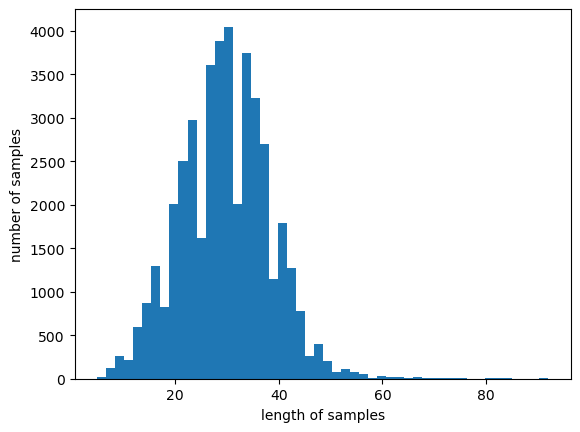

In [27]:
import matplotlib.pyplot as plt

print('최대 길이 :',max(len(review) for review in X_train))
print('평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(review) for review in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [28]:
def below_threshold_len(max_len, nested_list):
  count = 0
  for sentence in nested_list:
    if(len(sentence) <= max_len):
        count = count + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (count / len(nested_list))*100))

In [29]:
max_len = 50
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 50 이하인 샘플의 비율: 98.79880580305081


In [30]:
X_train = pad_sequences(X_train, maxlen=max_len)


In [31]:
len(y_train)

42874

In [32]:
len(X_train)

42874

In [33]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [34]:
y_train = y_train.astype(int)

In [35]:
pd.Series(y_train).value_counts()

0    9320
1    9160
2    9143
3    9125
4    6126
dtype: int64

In [36]:
num = np.unique(y_train, axis=0)
num = num.shape[0]
one_hot_y_train = np.eye(num)[y_train]
one_hot_y_train

array([[0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.]])

In [37]:
embedding_dim = 100
hidden_units = 128

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(LSTM(hidden_units))
model.add(Dense(5, activation='softmax'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(X_train, one_hot_y_train, epochs=50, callbacks=[es, mc], batch_size=64, validation_split=0.2)

Metal device set to: Apple M2

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2023-03-04 12:35:09.252057: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-03-04 12:35:09.252183: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/50


2023-03-04 12:35:09.956327: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-03-04 12:35:11.192950: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-03-04 12:35:11.337210: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-03-04 12:35:11.883659: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


536/536 [==============================] - ETA: 0s - loss: 1.0978 - acc: 0.5620

2023-03-04 12:35:29.171592: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-03-04 12:35:29.230603: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.



Epoch 1: val_acc improved from -inf to 0.45504, saving model to best_model.h5
536/536 [==============================] - 21s 35ms/step - loss: 1.0978 - acc: 0.5620 - val_loss: 1.3752 - val_acc: 0.4550
Epoch 2/50
536/536 [==============================] - ETA: 0s - loss: 0.7817 - acc: 0.7233
Epoch 2: val_acc improved from 0.45504 to 0.47627, saving model to best_model.h5
536/536 [==============================] - 17s 31ms/step - loss: 0.7817 - acc: 0.7233 - val_loss: 1.2804 - val_acc: 0.4763
Epoch 3/50
535/536 [============================>.] - ETA: 0s - loss: 0.6849 - acc: 0.7603
Epoch 3: val_acc improved from 0.47627 to 0.50099, saving model to best_model.h5
536/536 [==============================] - 16s 30ms/step - loss: 0.6847 - acc: 0.7603 - val_loss: 1.2698 - val_acc: 0.5010
Epoch 4/50
535/536 [============================>.] - ETA: 0s - loss: 0.6090 - acc: 0.7908
Epoch 4: val_acc did not improve from 0.50099
536/536 [==============================] - 16s 31ms/step - loss: 0.6091

In [38]:
history_df = pd.DataFrame(history.history)
history_df

loss       acc  val_loss   val_acc
0  1.097771  0.562028  1.375210  0.455044
1  0.781673  0.723286  1.280373  0.476268
2  0.684669  0.760343  1.269832  0.500991
3  0.609079  0.790664  1.383023  0.470904
4  0.550933  0.811627  1.539960  0.476618
5  0.490918  0.833785  1.582224  0.452361
6  0.438009  0.850724  1.624392  0.470087

In [39]:
loaded_model = load_model('best_model.h5')

In [40]:
import re

def sentiment_predict(new_sentence):
  new_sentence = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','', new_sentence)
  new_sentence = okt.morphs(new_sentence, stem=True) # 토큰화
  new_sentence = [word for word in new_sentence if not word in stopwords] # 불용어 제거
  encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
  pad_new = pad_sequences(encoded, maxlen = max_len) # 패딩
  score = float(np.argmax(loaded_model.predict(pad_new), axis=-1)) # 예측
  if score == 0:
    print('불안')
  elif score == 1:
    print('분노')
  elif score == 2:
    print('상처')
  elif score == 3:
    print('슬픔')
  elif score == 4:
    print('기쁨')
  # print(f'score = {score}')

In [41]:
sentiment_predict('화나')


2023-03-04 12:37:30.830158: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-03-04 12:37:30.991228: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 1s/step
분노


In [42]:
sentiment_predict('기뻐')

1/1 [==============================] - 0s 19ms/step
기쁨


In [43]:
sentiment_predict('슬퍼')

1/1 [==============================] - 0s 24ms/step
슬픔


In [44]:
sentiment_predict('나는 오늘 밥을 먹었어')

1/1 [==============================] - 0s 27ms/step
기쁨


In [45]:
sentiment_predict('배고픔을 채우기보다 즐거움을 채우기 위해')

1/1 [==============================] - 0s 21ms/step
분노


In [46]:
sentiment_predict('생일 축하해')

1/1 [==============================] - 0s 16ms/step
기쁨


In [47]:
sentiment_predict('나 연애 언제하는지좀 물어봐줘')

1/1 [==============================] - 0s 20ms/step
분노


In [48]:
sentiment_predict('나 지금 행복해')

1/1 [==============================] - 0s 17ms/step
기쁨


In [49]:
sentiment_predict('나 지금 밥먹을거거든')

1/1 [==============================] - 0s 24ms/step
기쁨


In [50]:
sentiment_predict('으악')

1/1 [==============================] - 0s 17ms/step
기쁨


In [51]:
sentiment_predict('종강은 언제오나')

1/1 [==============================] - 0s 17ms/step
분노


In [52]:
sentiment_predict('엘리베이터에 갇혔어')

1/1 [==============================] - 0s 19ms/step
분노


In [53]:
sentiment_predict('프로젝트 하고 있어')

1/1 [==============================] - 0s 19ms/step
기쁨


In [54]:
sentiment_predict('엄마가 피부과 빨리 갔다오래')

1/1 [==============================] - 0s 18ms/step
분노


In [55]:
sentiment_predict('쉽지 않아')

1/1 [==============================] - 0s 19ms/step
분노


In [56]:
sentiment_predict('아이유랑 결혼하고싶어')

1/1 [==============================] - 0s 18ms/step
기쁨


In [57]:
sentiment_predict('집에 가고 싶은데')

1/1 [==============================] - 0s 19ms/step
기쁨


In [58]:
sentiment_predict('나 내일 군대가')

1/1 [==============================] - 0s 30ms/step
불안


In [59]:
sentiment_predict('선임이 괴롭혀')

1/1 [==============================] - 0s 21ms/step
불안


In [60]:
sentiment_predict('시끄러워 죽겠어')

1/1 [==============================] - 0s 21ms/step
분노


In [61]:
sentiment_predict('아 열받네')

1/1 [==============================] - 0s 16ms/step
분노


In [62]:
sentiment_predict('나 오늘 배신당했어')

1/1 [==============================] - 0s 63ms/step
상처


In [63]:
sentiment_predict('나 오늘 배신당했어')

1/1 [==============================] - 0s 17ms/step
상처


In [64]:
sentiment_predict('100일')

1/1 [==============================] - 0s 17ms/step
기쁨


In [65]:
sentiment_predict('너랑 나랑 사귄지 벌써 100일이야')

1/1 [==============================] - 0s 16ms/step
기쁨


In [66]:
sentiment_predict('나랑 함께해줘서 고마워')

1/1 [==============================] - 0s 19ms/step
기쁨


In [67]:
sentiment_predict('스카이넷 초기모델이 나올거같은데')

1/1 [==============================] - 0s 17ms/step
기쁨


In [68]:
sentiment_predict('우상욱 왜 안와')

1/1 [==============================] - 0s 17ms/step
슬픔


In [69]:
sentiment_predict('우상욱 까불지마')

1/1 [==============================] - 0s 19ms/step
상처


In [70]:
test_val_df = pd.read_csv('./train_surprise.csv')

In [71]:
test_list = []
for sentence in tqdm(test_val_df['사람문장']):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    test_list.append(stopwords_removed_sentence)

100%|██████████| 8756/8756 [00:29<00:00, 300.96it/s]


In [72]:
X_test = tokenizer.texts_to_sequences(test_list)
X_test = pad_sequences(X_test, maxlen=max_len)

In [73]:
y_pred = loaded_model.predict(X_test)

274/274 [==============================] - 3s 10ms/step


In [74]:
tmp = np.argmax(loaded_model.predict(X_test), axis=-1) # 예측


274/274 [==============================] - 3s 10ms/step


In [75]:
test_val_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8756 entries, 0 to 8755
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0.2  8756 non-null   int64 
 1   Unnamed: 0.1  8756 non-null   int64 
 2   Unnamed: 0    8756 non-null   int64 
 3   상황키워드         8756 non-null   object
 4   감정_대분류        8756 non-null   object
 5   사람문장          8756 non-null   object
dtypes: int64(3), object(3)
memory usage: 410.6+ KB


In [76]:
test_val_df['추정_감정_대분류'] = pd.DataFrame(tmp)

In [77]:
test_val_df['추정_감정_대분류'].value_counts()

1    2552
0    2473
3    1826
2    1485
4     420
Name: 추정_감정_대분류, dtype: int64

In [78]:
def num_to_emo(number):
    if number == 0:
        return '불안'
    elif number == 1:
        return '분노'
    elif number == 2:
        return '상처'
    elif number == 3:
        return '슬픔'
    elif number == 4:
        return '기쁨'

In [79]:
test_val_df['추정_감정_대분류'] = test_val_df['추정_감정_대분류'].apply(num_to_emo)

In [84]:
test_val_df

Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0     상황키워드 감정_대분류  \
0                0             0          14  진로,취업,직장     당황   
1                1             1          15  진로,취업,직장     당황   
2                2             2          16  진로,취업,직장     당황   
3                3             3          17  진로,취업,직장     당황   
4                4             4          29  진로,취업,직장     당황   
...            ...           ...         ...       ...    ...   
8751          8751          8751       51601  진로,취업,직장     당황   
8752          8752          8752       51613      가족관계     당황   
8753          8753          8753       51616      대인관계     당황   
8754          8754          8754       51617      대인관계     당황   
8755          8755          8755       51623     건강,죽음     당황   

                                                   사람문장 추정_감정_대분류  
0     길을 가다가 우연히 마주친 동네 아주머니께서 취업했냐고 물어보셔서 당황했어. 평소 ...        불안  
1     어제 합격 통보를 받은 회사에서 문자를 잘못 발송했다고 연락이 왔어. 너무 당혹스럽...        불안  
2     나 오늘 첫 출근 했는데 너무 당황스러웠어! 버스 타고 카드를 찍으려고 하는데 지갑...        분노  
3     이번에 직장을 이직했는데 글쎄 만나고 싶지 않은 사람을 만나서 아주 당황스럽더라고....        불안  
4     이번에 중소기업에 취업하게 되었어. 친구들에게 말하기가 조금 부끄러워. 요즘같이 어...        기쁨  
...                                                 ...       ...  
8751  남편의 사업이 망했어. 남은 자금도 없어서 생계에 문제가 생길까 봐 두려워. 남편에...        불안  
8752  부모님이 내가 밖에 나가려고만 하면 간섭을 하셔. 속상해. 내가 너무 험하게 놀고 ...        상처  
8753  결혼 후 독립에 대한 양가 부모님의 생각이 달라. 어떻게 하면 좋을지 모르겠어. 장...        불안  
8754  내가 아내한테 정말 잘해주고 있는 게 맞는지 의문이 들어. 속상해. 아내가 많이 힘...        상처  
8755  이제 몸이 점점 약해진다는 게 느껴져. 아내에게 미안하고 속상한 마음이 들어. 이젠...        슬픔  

[8756 rows x 7 columns]

In [85]:
test_val_df[['상황키워드', '감정_대분류', '사람문장', '추정_감정_대분류']]

상황키워드 감정_대분류                                               사람문장  \
0     진로,취업,직장     당황  길을 가다가 우연히 마주친 동네 아주머니께서 취업했냐고 물어보셔서 당황했어. 평소 ...   
1     진로,취업,직장     당황  어제 합격 통보를 받은 회사에서 문자를 잘못 발송했다고 연락이 왔어. 너무 당혹스럽...   
2     진로,취업,직장     당황  나 오늘 첫 출근 했는데 너무 당황스러웠어! 버스 타고 카드를 찍으려고 하는데 지갑...   
3     진로,취업,직장     당황  이번에 직장을 이직했는데 글쎄 만나고 싶지 않은 사람을 만나서 아주 당황스럽더라고....   
4     진로,취업,직장     당황  이번에 중소기업에 취업하게 되었어. 친구들에게 말하기가 조금 부끄러워. 요즘같이 어...   
...        ...    ...                                                ...   
8751  진로,취업,직장     당황  남편의 사업이 망했어. 남은 자금도 없어서 생계에 문제가 생길까 봐 두려워. 남편에...   
8752      가족관계     당황  부모님이 내가 밖에 나가려고만 하면 간섭을 하셔. 속상해. 내가 너무 험하게 놀고 ...   
8753      대인관계     당황  결혼 후 독립에 대한 양가 부모님의 생각이 달라. 어떻게 하면 좋을지 모르겠어. 장...   
8754      대인관계     당황  내가 아내한테 정말 잘해주고 있는 게 맞는지 의문이 들어. 속상해. 아내가 많이 힘...   
8755     건강,죽음     당황  이제 몸이 점점 약해진다는 게 느껴져. 아내에게 미안하고 속상한 마음이 들어. 이젠...   

     추정_감정_대분류  
0           불안  
1           불안  
2           분노  
3           불안  
4           기쁨  
...        ...  
8751        불안  
8752        상처  
8753        불안  
8754        상처  
8755        슬픔  

[8756 rows x 4 columns]

In [86]:
test_val_df = test_val_df[['상황키워드', '감정_대분류', '사람문장', '추정_감정_대분류']]

In [87]:
test_val_df.to_csv('surprise_val_data.csv', index=False)